# Data from European Centre for Disease Prevention and Control (ECDC)
### https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide


In [1]:
from jupyter_plotly_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px

In [2]:
import urllib.request
import datetime
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
# plt.style.use('classic')

# import seaborn as sns
# sns.set()
# palette = sns.color_palette("bright")
# sns.palplot(palette)
# palette = sns.color_palette("Accent")
# sns.palplot(palette)
# palette = sns.color_palette("Paired")
# sns.palplot(palette)
# palette = sns.color_palette("Set3")
# sns.palplot(palette)


# # sns.set_palette("bright", 12)
# # sns.set_palette('Paired')


In [5]:
print('Beginning file download with urllib2...')
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
filecsv = datetime.datetime.now().strftime('ecdc-data_%Y%m%d.csv')
print(filecsv)
# urllib.request.urlretrieve(url, filecsv)

Beginning file download with urllib2...
ecdc-data_20200427.csv


('ecdc-data_20200427.csv', <http.client.HTTPMessage at 0x7fe5e90bb690>)

In [6]:
print(filecsv)
tsall = pd.read_csv(filecsv)
print(tsall.shape)
tsall.head()

ecdc-data_20200427.csv
(13211, 11)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,26/04/2020,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
1,25/04/2020,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
2,24/04/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
3,23/04/2020,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
4,22/04/2020,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia


In [7]:
keep_cols = ['dateRep', 'cases', 'deaths', 'countriesAndTerritories', 'popData2018']
tsall = tsall[keep_cols]
tsall.head(2)

,dateRep,cases,deaths,countriesAndTerritories,popData2018
0,26/04/2020,112,4,Afghanistan,37172386.0
1,25/04/2020,70,1,Afghanistan,37172386.0


In [8]:
tsall['dateRep'] = pd.to_datetime(tsall['dateRep'], format='%d/%m/%Y')
tsall['cases_pop'] = tsall['cases']/tsall['popData2018']*100.
tsall['deaths_pop'] = tsall['deaths']/tsall['popData2018']*100.
tsall.head(2)

,dateRep,cases,deaths,countriesAndTerritories,popData2018,cases_pop,deaths_pop
0,2020-04-26,112,4,Afghanistan,37172386.0,0.000301,0.000011
1,2020-04-25,70,1,Afghanistan,37172386.0,0.000188,0.000003


In [9]:
select = ['Portugal', 'New_Zealand', 'Spain', 'France', 'Italy', 'Belgium', 'Austria']
ts = tsall[tsall['countriesAndTerritories'].isin(select)]
print(ts.shape)
ts.head()

(753, 7)


,dateRep,cases,deaths,countriesAndTerritories,popData2018,cases_pop,deaths_pop
732,2020-04-26,66,23,Austria,8847037.0,0.000746,0.000260
733,2020-04-25,83,5,Austria,8847037.0,0.000938,0.000057
734,2020-04-24,61,14,Austria,8847037.0,0.000689,0.000158
735,2020-04-23,91,31,Austria,8847037.0,0.001029,0.000350
736,2020-04-22,50,1,Austria,8847037.0,0.000565,0.000011


In [10]:
ts = tsall.copy()

# Plot latest numbers

In [11]:
timef = ts.iloc[0]['dateRep']
print(timef)
latest = ts[ts['dateRep']==timef]
print(latest.shape)
latest

2020-04-26 00:00:00
(205, 7)


,dateRep,cases,deaths,countriesAndTerritories,popData2018,cases_pop,deaths_pop
0,2020-04-26,112,4,Afghanistan,37172386.0,0.000301,0.000011
108,2020-04-26,34,0,Albania,2866376.0,0.001186,0.000000
157,2020-04-26,129,4,Algeria,42228429.0,0.000305,0.000009
270,2020-04-26,2,0,Andorra,77006.0,0.002597,0.000000
314,2020-04-26,0,0,Angola,30809762.0,0.000000,0.000000
...,...,...,...,...,...,...,...
13003,2020-04-26,0,0,Vietnam,95540395.0,0.000000,0.000000
13117,2020-04-26,6,0,Western_Sahara,NaN,NaN,NaN
13118,2020-04-26,0,0,Yemen,28498687.0,0.000000,0.000000
13135,2020-04-26,0,0,Zambia,17351822.0,0.000000,0.000000


### Remove the big countries

countriesAndTerritories
Philippines                 1.066519e+08
Ethiopia                    1.092246e+08
Mexico                      1.261908e+08
Japan                       1.265291e+08
Russia                      1.444780e+08
Bangladesh                  1.613560e+08
Nigeria                     1.958747e+08
Brazil                      2.094693e+08
Pakistan                    2.122150e+08
Indonesia                   2.676634e+08
United_States_of_America    3.271674e+08
India                       1.352617e+09
China                       1.392730e+09
Name: popData2018, dtype: float64


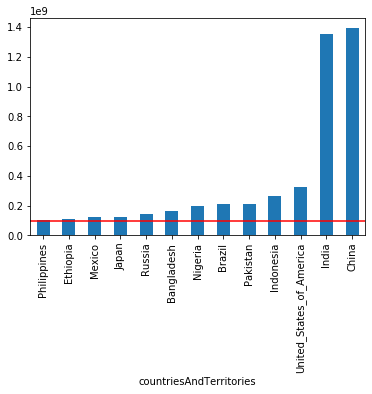

In [12]:
pop_max = 1.e8
pop = latest.groupby('countriesAndTerritories').first()['popData2018']
pop = pop.sort_values()
biggies = pop[pop>pop_max]
print(biggies)
ax = biggies.plot(kind='bar')
_ = ax.axhline(y=pop_max, color='r')

In [13]:
print(biggies.head(2))

fig = px.bar(biggies.reset_index(), 
             x='countriesAndTerritories', 
             y='popData2018',
             text='popData2018')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

app = JupyterDash('SimpleGraph')
app.layout = html.Div([
    dcc.Graph(figure=fig)
])
app




countriesAndTerritories
Philippines    106651922.0
Ethiopia       109224559.0
Name: popData2018, dtype: float64


In [14]:
import plotly.graph_objects as go

print(biggies.head(2))

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=biggies.index,
        y=biggies.values,
        text=biggies.values,
    ))

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


# fig.add_trace(
#     go.Scatter(
#         mode='lines',
#         x=biggies.index,
#         y=[pop_max]*len(biggies.index),
#     ))

fig.update_layout(shapes=[
    dict(type='line', 
         xref='paper', x0=0, x1=1,
         yref='y', y0=pop_max, y1=pop_max)])

app = JupyterDash('SimpleGraph')
app.layout = html.Div([
    dcc.Graph(figure=fig)
])
app




countriesAndTerritories
Philippines    106651922.0
Ethiopia       109224559.0
Name: popData2018, dtype: float64


In [15]:
print(latest.shape)
latest = latest[~latest['countriesAndTerritories'].isin(biggies.index)]
print(latest.shape)

(205, 7)
(192, 7)


['Belgium' 'Iran' 'Saudi_Arabia' 'Canada' 'Singapore' 'France' 'Germany'
 'Italy' 'Turkey' 'Peru' 'United_Kingdom']


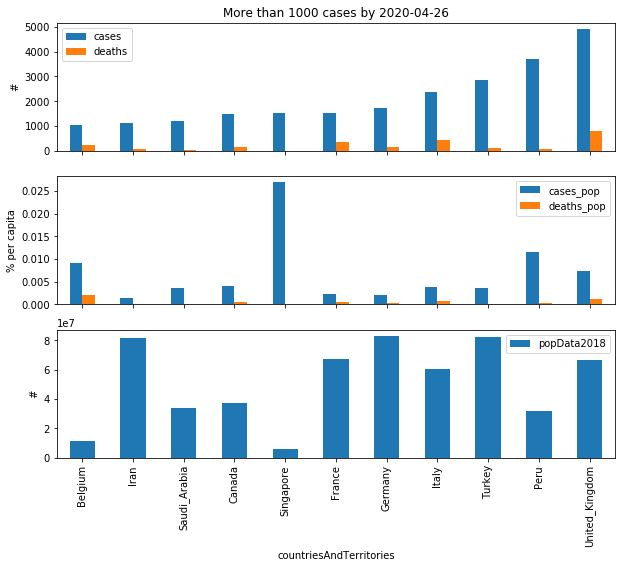

In [16]:
cases_max = 1000
latest2 = latest[latest['cases']>cases_max]
tsx = latest2.sort_values('cases')
tsx

fig, axs = plt.subplots(3,1, figsize=(10,8), sharex=True)
ax = axs[0]
tsx.plot(ax=ax, kind='bar', y=['cases', 'deaths'], x='countriesAndTerritories')
ax.set_ylabel('#')

ax = axs[1]
tsx.plot(ax=ax, kind='bar', y=['cases_pop', 'deaths_pop'], x='countriesAndTerritories')
ax.set_ylabel('% per capita')

ax = axs[2]
tsx.plot(ax=ax, kind='bar', y='popData2018', x='countriesAndTerritories')
ax.set_ylabel('#')

axs[0].set_title('More than {cases_max} cases by {timef:%Y-%m-%d}'.format(cases_max=cases_max, timef=timef))

countries_ordered = tsx['countriesAndTerritories'].values
print(countries_ordered)

['Peru' 'Singapore' 'Qatar']


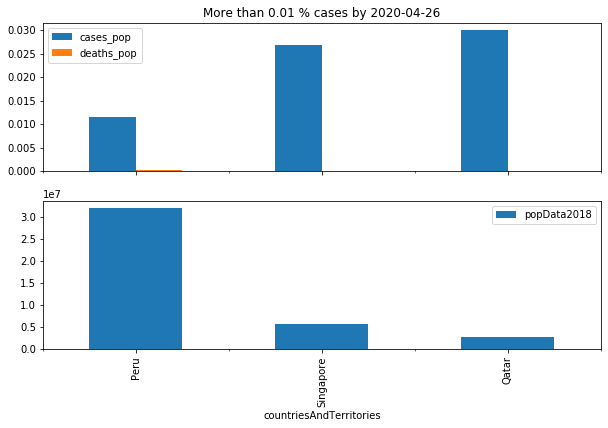

In [17]:
cases_pop_max = 0.01 
latest2 = latest[latest['cases_pop'] > cases_pop_max]
tsx = latest2.sort_values('cases_pop')
tsx

fig, axs = plt.subplots(2,1, figsize=(10,6), sharex=True)
ax = axs[0]
tsx.plot(ax=ax, kind='bar', y=['cases_pop', 'deaths_pop'], x='countriesAndTerritories')
_ = ax.set_title(timef)
ax = axs[1]
tsx.plot(ax=ax, kind='bar', y='popData2018', x='countriesAndTerritories')

axs[0].set_title('More than {cases_pop_max} % cases by {timef:%Y-%m-%d}'.format(
    cases_pop_max=cases_pop_max, timef=timef))

countries_ordered_pop = tsx['countriesAndTerritories'].values
print(countries_ordered_pop)


# Plot time series "days since 0"

In [18]:
bycountries = ts.groupby('countriesAndTerritories')
cases0 = {}
deaths0 = {}
tsnew = {}
for country,index in bycountries.groups.items():
#     print(country, len(index))
#     print(ts.loc[index].shape)

    ts1 = ts.loc[index]
    
    try:
        i0 = np.where(ts1['cases']==0)[0][0]
    except IndexError:
        i0 = ts1['cases'].shape[0]-1
    day_cases0 = ts1.iloc[i0]['dateRep']  # last day with cases 0
    ts1['days_since_cases0'] = (ts1['dateRep'] - day_cases0) / np.timedelta64(1,'D')

    try:
        i0 = np.where(ts1['deaths']==0)[0][0]
    except IndexError:
        i0 = ts1['deaths'].shape[0]-1
    day_deaths0 = ts1.iloc[i0]['dateRep']  # last day with deaths 0
    ts1['days_since_deaths0'] = (ts1['dateRep'] - day_deaths0) / np.timedelta64(1,'D')

    cases0[country] = day_cases0
    deaths0[country] = day_deaths0
    tsnew[country] = ts1

tsnew = pd.concat(tsnew, ignore_index=True)
tsnew.head(2)

,dateRep,cases,deaths,countriesAndTerritories,popData2018,cases_pop,deaths_pop,days_since_cases0,days_since_deaths0
0,2020-04-26,112,4,Afghanistan,37172386.0,0.000301,0.000011,22.0,7.0
1,2020-04-25,70,1,Afghanistan,37172386.0,0.000188,0.000003,21.0,6.0


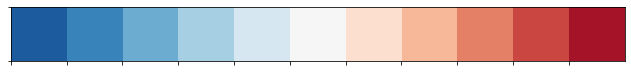

In [21]:
import seaborn as sns 
palette = sns.color_palette("RdBu_r", len(countries_ordered))
sns.palplot(palette)
sns.set_palette(palette)

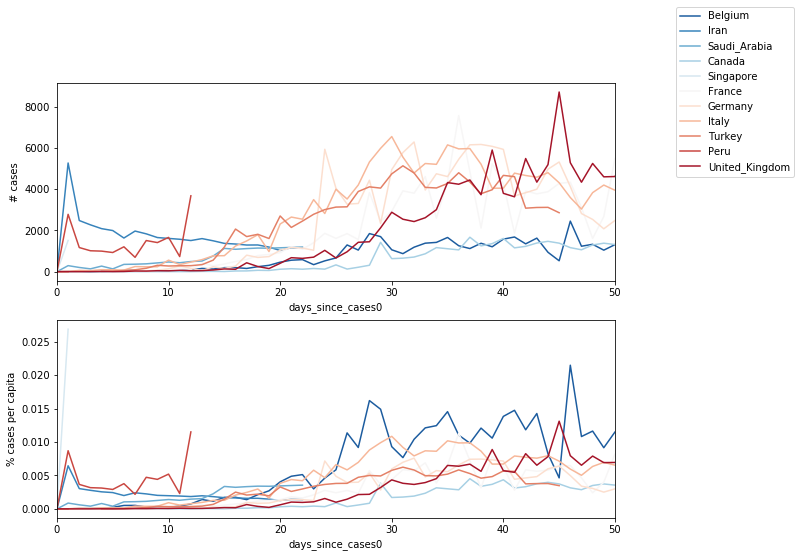

In [22]:
# import matplotlib.pyplot as plt 
# fig, ax = plt.subplots(figsize=(10,4))
# for key, grp in tsnew.groupby(['countriesAndTerritories']):
#     ax.plot(grp['days_since_cases0'], grp['cases'], label=key)

# ax.legend()
# ax.set_xlim([0,50])
# ax.grid()

fig, axs = plt.subplots(2,1, figsize=(10,8), sharex=False, sharey=False)

tb = pd.pivot_table(tsnew,
                    index='days_since_cases0', 
                    columns='countriesAndTerritories', 
                    values='cases')

ax = axs[0]
tb[countries_ordered].plot(ax=ax, legend=False)
ax.set_ylabel('# cases')
ax.set_xlim([0,50])

tb = pd.pivot_table(tsnew,
                    index='days_since_cases0', 
                    columns='countriesAndTerritories', 
                    values='cases_pop')

ax = axs[1]
tb[countries_ordered].plot(ax=ax, legend=False)
ax.set_ylabel('% cases per capita')
ax.set_xlim([0,50])

axs[0].legend(bbox_to_anchor=(1.1,0.5))

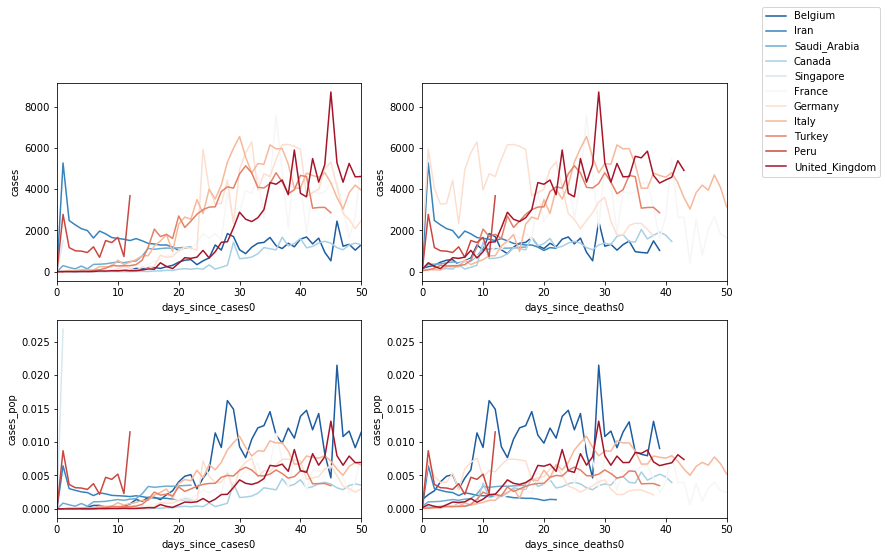

In [23]:

fig, axs = plt.subplots(2,2, figsize=(12,8), sharex=False, sharey=False)

tb = pd.pivot_table(tsnew, 
                    columns='countriesAndTerritories', 
                    index='days_since_cases0', 
                    values='cases')

ax = axs[0,0]
tb[countries_ordered].plot(ax=ax, legend=False)
ax.set_xlim([0,50])
ax.set_ylabel('cases')

tb = pd.pivot_table(tsnew, 
                    columns='countriesAndTerritories', 
                    index='days_since_cases0', 
                    values='cases_pop')

ax = axs[1,0]
tb[countries_ordered].plot(ax=ax, legend=False)
ax.set_xlim([0,50])
ax.set_ylabel('cases_pop')

tb = pd.pivot_table(tsnew, 
                    columns='countriesAndTerritories', 
                    index='days_since_deaths0', 
                    values='cases')

ax = axs[0,1]
tb[countries_ordered].plot(ax=ax, legend=False)
ax.set_xlim([0,50])
ax.set_ylabel('cases')

tb = pd.pivot_table(tsnew, 
                    columns='countriesAndTerritories', 
                    index='days_since_deaths0', 
                    values='cases_pop')

ax = axs[1,1]
tb[countries_ordered].plot(ax=ax, legend=False)
ax.set_xlim([0,50])
ax.set_ylabel('cases_pop')

axs[0,1].legend(bbox_to_anchor=(1.1,0.5))
